In [1]:
#We have to prepare a classification model for the given data using KNN.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [6]:
data=pd.read_csv("glass.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [10]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
#The data does not contain null values.

array([[<AxesSubplot:title={'center':'RI'}>,
        <AxesSubplot:title={'center':'Na'}>,
        <AxesSubplot:title={'center':'Mg'}>],
       [<AxesSubplot:title={'center':'Al'}>,
        <AxesSubplot:title={'center':'Si'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'Ba'}>,
        <AxesSubplot:title={'center':'Fe'}>],
       [<AxesSubplot:title={'center':'Type'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

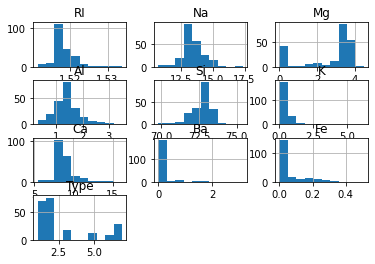

In [13]:
data.hist()

<AxesSubplot:>

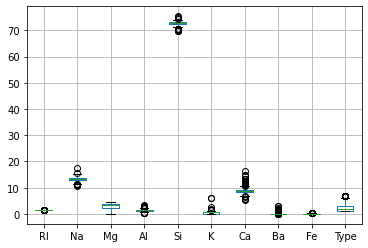

In [15]:
data.boxplot()

In [32]:
filename = 'glass.csv'
names = [
    'RI', 'Na', 'Mg', 'AI','Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'
]
dataframe =pd.read_csv(filename, names=names)
array = dataframe.values
X = array[1:, 0:9]
Y = array[1:, 9]

In [33]:
X

array([['1.52101', '13.64', '4.49', ..., '8.75', '0', '0'],
       ['1.51761', '13.89', '3.6', ..., '7.83', '0', '0'],
       ['1.51618', '13.53', '3.55', ..., '7.78', '0', '0'],
       ...,
       ['1.52065', '14.36', '0', ..., '8.44', '1.64', '0'],
       ['1.51651', '14.38', '0', ..., '8.48', '1.57', '0'],
       ['1.51711', '14.23', '0', ..., '8.62', '1.67', '0']], dtype=object)

In [34]:
Y

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '6', '6', '6', '6', '6

In [35]:
dataframe

,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0,1
2,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0,0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0,2.88,72.61,0.08,9.18,1.06,0,7
211,1.51685,14.92,0,1.99,73.06,0,8.4,1.59,0,7
212,1.52065,14.36,0,2.02,73.42,0,8.44,1.64,0,7
213,1.51651,14.38,0,1.94,73.61,0,8.48,1.57,0,7


In [36]:
num_folds=10
kfold=KFold(n_splits=10)

In [51]:
model1=KNeighborsClassifier(n_neighbors=12)
result1=cross_val_score(model1,X,Y,cv=kfold)

In [ ]:
#Since it is a regression problem,KNN will return mean.
#For classification problem,KNN will return mode.

In [52]:
print(result1.mean())

0.42878787878787883


In [39]:
# we will now use Grid search for algorithm tuning.

# Grid Search for Algorithm tuning.

In [53]:
import numpy
from sklearn.model_selection import GridSearchCV

In [54]:
filename = 'glass.csv'
names = [
    'RI', 'Na', 'Mg', 'AI','Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'
]
dataframe =pd.read_csv(filename, names=names)
array = dataframe.values
X = array[1:, 0:9]
Y = array[1:, 9]

In [55]:
dataframe

,RI,Na,Mg,AI,Si,K,Ca,Ba,Fe,Type
0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0,1
2,1.51761,13.89,3.6,1.36,72.73,0.48,7.83,0,0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0,2.88,72.61,0.08,9.18,1.06,0,7
211,1.51685,14.92,0,1.99,73.06,0,8.4,1.59,0,7
212,1.52065,14.36,0,2.02,73.42,0,8.44,1.64,0,7
213,1.51651,14.38,0,1.94,73.61,0,8.48,1.57,0,7


In [60]:
n_neighbors=numpy.array(range(1,50))
param_grid=dict(n_neighbors=n_neighbors)

In [61]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}

In [68]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [69]:
grid.cv_results_['mean_fit_time']

array([1.96843147e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.11179161e-03, 3.12581062e-03,
       7.81106949e-04, 3.14664841e-04, 6.73151016e-04, 3.25317383e-03,
       3.12409401e-03, 7.15732574e-05, 3.12490463e-03, 0.00000000e+00,
       3.14903259e-03, 3.12752724e-03, 0.00000000e+00, 3.12600136e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.12795639e-03, 0.00000000e+00, 3.12714577e-03, 3.12733650e-03,
       0.00000000e+00, 3.12528610e-03, 0.00000000e+00, 6.25252724e-03,
       0.00000000e+00, 3.12728882e-03, 3.12933922e-03, 6.97088242e-04,
       3.12552452e-03, 0.00000000e+00, 0.00000000e+00, 3.20272446e-03,
       0.00000000e+00, 3.32875252e-03, 3.12185287e-03, 0.00000000e+00,
       0.00000000e+00, 6.23393059e-03, 0.00000000e+00, 3.12418938e-03,
       0.00000000e+00])

In [70]:
print(grid.best_score_)
print(grid.best_params_)

0.640531561461794
{'n_neighbors': 1}


In [71]:
# We get best score when n_neighbors=1.

# Visualizing the CV results.

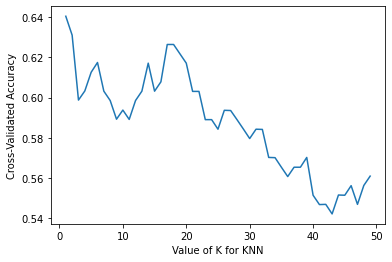

In [73]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 50
k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()